<a href="https://colab.research.google.com/github/tellnett/Alura/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [43]:
import pandas as pd

# Fonte dos dados
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

# Extração
df = pd.read_json(url)
print("✅ Dados extraídos com sucesso!")



✅ Dados extraídos com sucesso!


#🔧 Transformação

In [48]:
# Renomear colunas para formato padrão
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Corrigir tipo de dado da coluna 'totalgasto'
df['totalgasto'] = pd.to_numeric(df.get('totalgasto', pd.Series(dtype='float64')), errors='coerce')
df['totalgasto'].fillna(df['totalgasto'].median(), inplace=True)

# Converter 'churn' para binário
df['churn'] = df['churn'].replace({'No': 0, 'Yes': 1})

# Remover colunas irrelevantes (exemplo: ID se existir)
if 'id_cliente' in df.columns:
    df.drop(columns=['id_cliente'], inplace=True)

# Remover linhas com valores ausentes
df = df.dropna(subset=['churn', 'totalgasto'])  # só remove onde for essencial


print("🔧 Dados transformados com sucesso!")


🔧 Dados transformados com sucesso!


<ipython-input-48-e3068d63a019>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['totalgasto'].fillna(df['totalgasto'].median(), inplace=True)


#📊 Carga e análise

In [49]:
# Salvar os dados transformados em CSV local (pode ser adaptado para DBs)
df.to_csv("dados_telecom_transformados.csv", index=False)
print("💾 Dados carregados com sucesso em 'dados_telecom_transformados.csv'")


💾 Dados carregados com sucesso em 'dados_telecom_transformados.csv'


#📄Relatorio Final

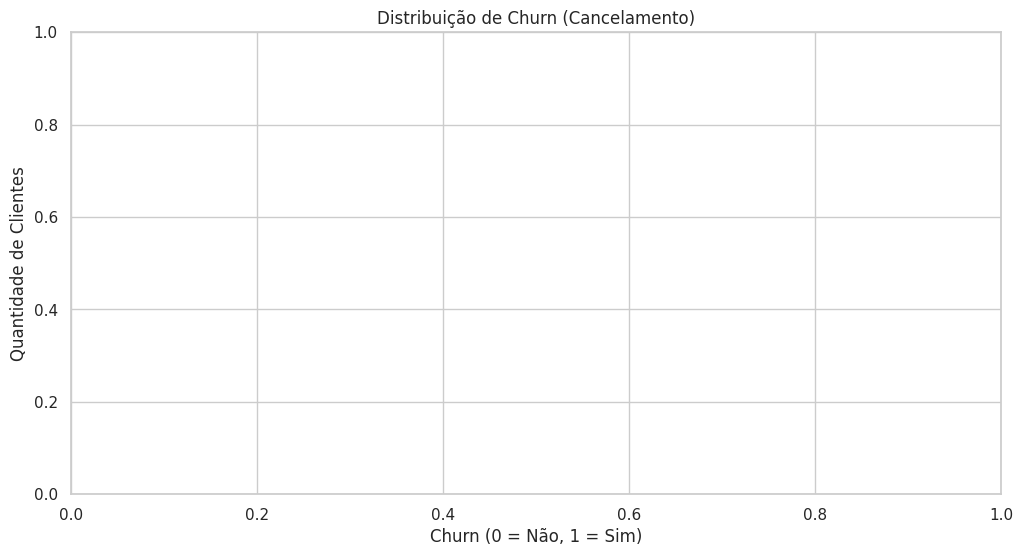

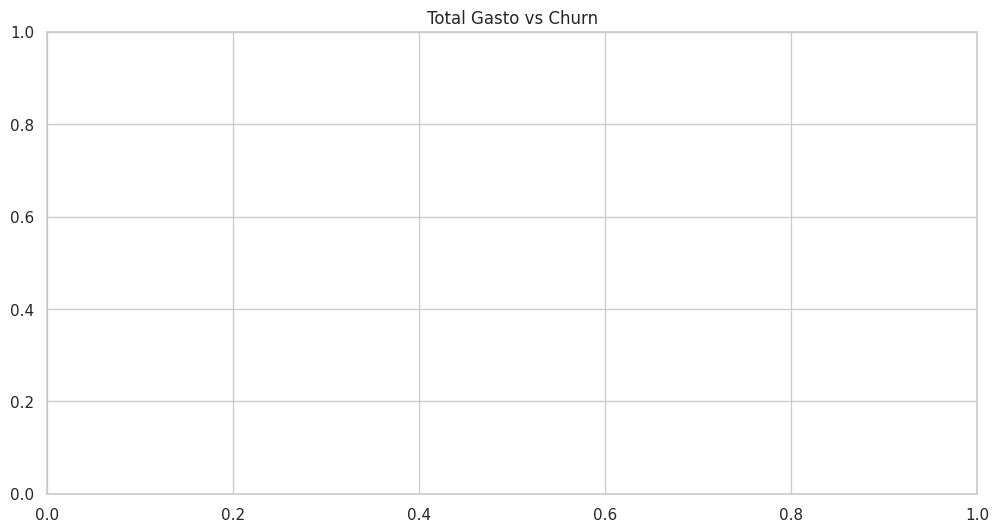

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


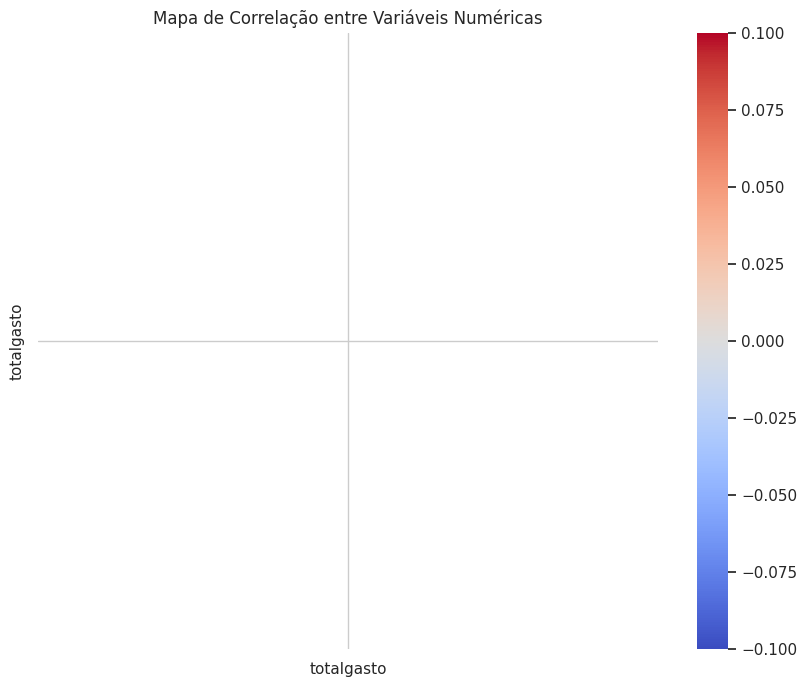

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Distribuição de churn
sns.countplot(x='churn', data=df)
plt.title("Distribuição de Churn (Cancelamento)")
plt.xlabel("Churn (0 = Não, 1 = Sim)")
plt.ylabel("Quantidade de Clientes")
plt.show()

# Boxplot de TotalGasto vs Churn
sns.boxplot(x='churn', y='totalgasto', data=df)
plt.title("Total Gasto vs Churn")
plt.show()

# Heatmap de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Mapa de Correlação entre Variáveis Numéricas")
plt.show()


In [42]:
# Quantidade total de clientes
total_clientes = len(df)

# Taxa de churn
taxa_churn = df['churn'].mean() * 100

# Média de gasto entre clientes que cancelaram
media_gasto_churn = df[df['churn'] == 1]['totalgasto'].mean()

# Gasto médio entre clientes que ficaram
media_gasto_ativos = df[df['churn'] == 0]['totalgasto'].mean()

# Exibir resumo
print("\n📋 RELATÓRIO FINAL:")
print(f"👥 Total de clientes: {total_clientes}")
print(f"📉 Taxa de Churn: {taxa_churn:.2f}%")
print(f"💰 Gasto médio (clientes com churn): R$ {media_gasto_churn:.2f}")
print(f"💸 Gasto médio (clientes ativos): R$ {media_gasto_ativos:.2f}")



📋 RELATÓRIO FINAL:
👥 Total de clientes: 0
📉 Taxa de Churn: nan%
💰 Gasto médio (clientes com churn): R$ nan
💸 Gasto médio (clientes ativos): R$ nan
